### Objective:

Twitter is an integral part of understanding and analyzing sentiments specific to crypto. So, in this blog, let us look into one of the ways to collect the data for web3.

Cryptocurrencies form the integral part of the web3 ecosystem. So, in this blog, let us get the historical tweets related to tokens. There are thousands of tokens available in the web3 ecosystem.

So, let us get started.

#### Data Collection

We will be using the python client - twint to get the data. Install/Upgrade it using the following command

```
!pip3 install -U twint
```

In [1]:
# !pip3 install twint altair vaderSentiment pandas nltk

In [1]:
import twint
import pandas as pd
import numpy as np
import altair as alt
from datetime import datetime, timedelta
import nest_asyncio
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

stop = stopwords.words("english")
nest_asyncio.apply()


def getTweets(search_term, until, since, limit=20, language="en"):
    c = twint.Config()
    c.Limit = limit
    c.Search = search_term
    c.Filter_retweets = True
    c.Popular_tweets = True
    c.Verified = True
    c.Lowercase = False
    c.Lang = "en"
    c.Until = f"{until} 00:00:00"
    c.Since = f"{since} 00:00:00"
    c.Pandas = True
    c.Hide_output = True
    twint.run.Search(c)
    df = twint.storage.panda.Tweets_df
    if len(df) <= 0:
        df = pd.DataFrame()
    df["date"] = df["date"].apply(lambda x: x.split(" ")[0])
    df = df[df["language"] == "en"]
    return df

### Data Collection
Here is the sample API call with twint. You can do a lot more with twint and please do refer the documentation - [Link](https://github.com/twintproject/twint)

In [ ]:
# start = "2018-09-01"
# end = "2022-10-01"
# search = "BTC"

# tweet_df = getTweets(
#     search,
#     until=(datetime.strptime(start, "%Y-%m-%d") + timedelta(days=1)).strftime(
#         "%Y-%m-%d"
#     ),
#     since=start,
#     limit=20,
# )

Desc

In [7]:
df = pd.read_csv("Bitcoin_tweets.csv").sample(100)
df = df[df["date"].fillna("").str.contains("20")].reset_index(drop=True)
df["datetime"] = pd.to_datetime(df["date"])
df["date"] = pd.to_datetime(df["datetime"]).apply(lambda x: x.date())
df["text_without_stopwords"] = df["text"].apply(
    lambda x: " ".join([word for word in x.split() if word not in (stop)])
)
df["hashtag_btc"] = df["hashtags"].str.lower().fillna('').apply(lambda x: 1 if '#btc' in x else 0)

sia = SentimentIntensityAnalyzer()
def get_values(x):
    sx = sia.polarity_scores(x["text_without_stopwords"])
    values = ["neg", "neu", "pos", "compound"]
    val = []
    for i in values:
        val.append(sx[i])
    return val
df[["neg", "neu", "pos", "compound"]] = df.apply(
        get_values, axis=1, result_type="expand"
    )
df["sentiment_class"] = df[["neg", "neu", "pos"]].apply(
    lambda x: np.argmax(x), axis=1
)
df.head()

/var/folders/18/11_pym2d6tj31v_7bjbd75wc0000gp/T/ipykernel_16504/857278560.py:1: DtypeWarning: Columns (4,5,6,7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Bitcoin_tweets.csv").sample(100)


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,...,source,is_retweet,datetime,text_without_stopwords,hashtag_btc,neg,neu,pos,compound,sentiment_class
0,Steve Urkel,NaN,"Swing trader. Share opinions only, not financi...",2020-06-08 20:43:11,15429.0,171.0,28552.0,False,2022-05-13,Bitcoin bouncing tonight after potential capit...,...,Twitter Web App,False,2022-05-13 03:44:03,Bitcoin bouncing tonight potential capitulatio...,1,0.0,0.877,0.123,0.5994,1
1,IT Tech,"Sosnowiec, Polska",Verified Author on @CryptoQuant_com\nIT. Crypt...,2013-03-27 12:38:47,294.0,805.0,13313.0,False,2021-08-21,Most of projects in profit today💰💡🧠\n#BTC #Bit...,...,Twitter for Android,False,2021-08-21 06:25:12,Most projects profit today💰💡🧠 #BTC #Bitcoin $B...,1,0.0,0.825,0.175,0.4902,1
2,Rng,NaN,"akun ini srg dipake buat berburu ga, mute aja ...",2018-08-23 14:46:29,78.0,2020,21739,False,2021-02-15,More than 200% Profits and 115M$ Volume in $SK...,...,Twitter for Android,False,2021-02-15 08:02:24,More 200% Profits 115M$ Volume $SKY Pump #Mega...,0,0.0,0.675,0.325,0.7407,1
3,Beebly,NaN,We are on a mission to be the largest and safe...,2022-07-03 13:56:56,0.0,0.0,0.0,False,2022-07-03,We are Launching in a few days! Stay Tuned! 🐝\...,...,Twitter Web App,False,2022-07-03 14:02:36,We Launching days! Stay Tuned! 🐝 #cryptoworld ...,1,0.0,1.000,0.000,0.0000,1
4,noname.sol,NaN,a b s o l u t e s l a y e r\n\nnot financial ...,2021-11-15 14:47:38,61.0,148.0,1487.0,False,2022-05-26,Even though I see #BTC capitulated on weekly ...,...,Twitter Web App,False,2022-05-26 23:50:25,Even though I see #BTC capitulated weekly time...,1,0.0,1.000,0.000,0.0000,1


In [9]:
df["hashtag_btc"] = df["hashtags"].str.lower().fillna('').apply(lambda x: 1 if '#btc' in x else 0)
df_tmp = df.groupby(["date", "hashtag_btc"]).agg("mean")["compound"].reset_index()
alt.Chart(df_tmp).mark_line().encode(x="date:T", y="compound", color = "hashtag_btc")

/var/folders/18/11_pym2d6tj31v_7bjbd75wc0000gp/T/ipykernel_16504/3388908695.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_tmp = df.groupby(["date", "hashtag_btc"]).agg("mean")["compound"].reset_index()
/Users/sai/.pyenv/versions/3.10.5/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


TypeError: Object of type date is not JSON serializable

alt.Chart(...)

In [ ]:
df_tmp = df.groupby("date").agg("count")["compound"].reset_index()
alt.Chart(df_tmp).mark_line().encode(x="date:T", y="compound")

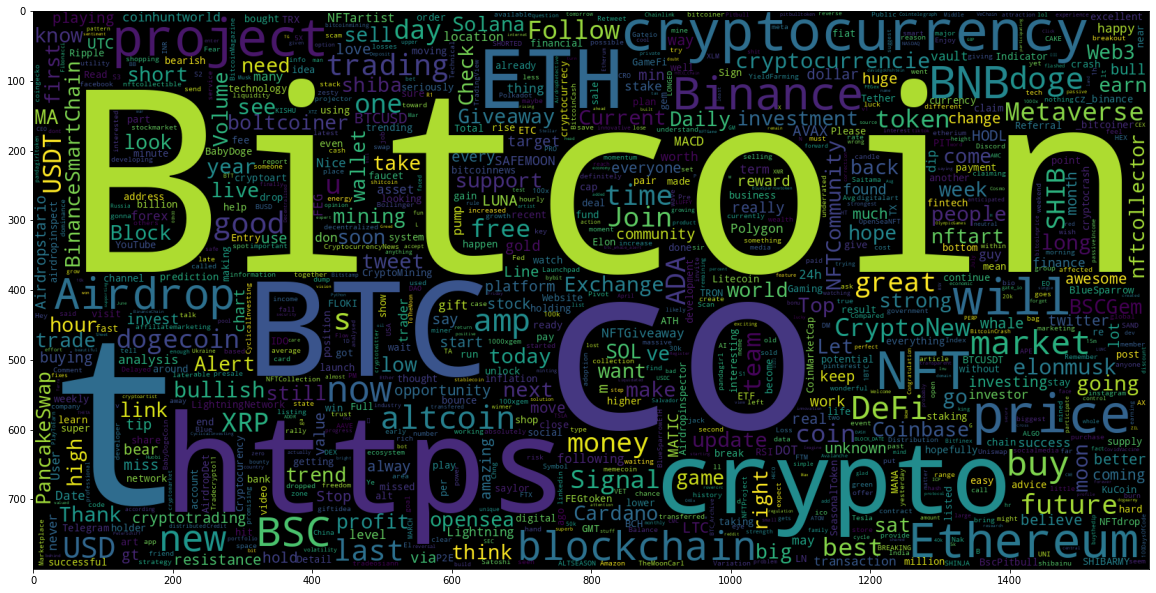

In [84]:
data_neg = df['text'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)